# Math Modeling: Introduction to Mathematic Modeling

## What is Mathematical Modeling?

Models are used to describe out beliefs about how the world functions. Mathematical modeling takes these beliefs and translates them into the language of mathematics. There they can benifit from mathematic's many advantages

1. **Precise**: The precision of the language of mathematics helps us formulate ideas and identify the assumptions underlying our beliefs.
2. **Concise**: Mathematics is a concise language with well-defined rules for operations and manipulations. It leaves much less room for ambiguity.
3. The proven results from millennia of mathematics research are at your disposal.

**Mathematical modeling:** The process of representing physical systems using mathematical expressions. Intuition, simulation, and analysis are used to build expressions that mimic general behaviours of physical systems. In general, this is an iterative process where the model is refined.

This process is largely influenced by compromise and error. Real world interacting systems are far too complicated to model in their entirety and thus require compromise. The first level of compromise is to identify only the most important parts of the system. These will be included in the model while the rest are excluded. The second level of compromise is to select the level of mathematical manipulation that is worth the effort. Mathematical modeling is often intensive and thus we must balance precision and effort.

### What are mathematical models?

Mathematical modeling is most often used to predict future behabior of systems.

- Newton's Laws of motion: model of classical mechanics.
- Maxwell's Equations: model of classical electromagnetism.
- Deterministic Finite Automaton: abstract model for the state of a system.
- Population growth: we know what this one is!

It is nearly garunteed that you have, already in your lifetime, made use of mathematical models or even developed one yourself.

## Analytical vs. Numerical Methods

**Analytical Methods:** Mathematical tools wherein we follow a set of logical steps that are proven to find the **exact** solution to a math equation.

An example of this would be the use of calculus to find the slope of a function.

$$
\frac{d}{dx}\left( \frac{1}{2} \left( 3x^2-1 \right) \right)\\
\ \\
\frac{1}{2} \frac{d}{dx}\left( 3x^2-1 \right)\\
\ \\
\frac{1}{2} \left( \frac{d}{dx}\left( 3x^2 \right) + \frac{d}{dx}\left( -1 \right) \right) \\
\ \\
\frac{1}{2} \left( 6x - 1 \right)
$$

While these methods are precise, not every systems representative math equation can be solved this way. Enter numerical methods.

**Numerical Methods:** Mathematical tools that allow us to **approximate** the solution to a math problem through itteration.

An example of this would be approximating a function using Euler's method where you approximate each next y value using the previous values slope.

---
Both of these methods are used to find solutions to a math equation that is used to model a physical system, however they take two very different approaches.

## Physical modeling

One of the most common class of mathematical modeling is the **Physical Model** which includes the likes of projectile motion, fluid dynamics, and more. From the laws of physics, math equations can be derived to model a situation then a method can be applied to evaluate the outcome of those models.

A great example would be of projectile motion which we will work through here.

First we have to set up the scene for the sim.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# sim settings
simulation_length = 10  # seconds
timestep = 0.001  # seconds

# configuration
g = 9.8  # m/s^2
cd = 0.3  # unitless
m = 1  # kg
A = 0.1  # m^2
rho = 1.2  # kg/m^3
launch_velocity = 100  # m/s
launch_angle = np.radians(45)  # degrees (converts to radians)

Now for the star of the show!

In [15]:
def euler(y, h, f):
    return y + h * f

Very short and to the point. That is the deceptive simplicity of many numerical methods. This may seem simple but lets get the rest of the legwork done.

In [16]:
def solve_ad():
    solution = np.zeros((int(simulation_length // timestep) + 1, 5))  # t, x, y, vx, vy
    solution[0, 3] = launch_velocity * np.cos(launch_angle)  # setting initial conditions
    solution[0, 4] = launch_velocity * np.sin(launch_angle)

    for t in range(int(simulation_length // timestep)):

        _, x, y, vx, vy = solution[t]

        theta = np.tan(vy / vx)  # we will need these
        v = np.sqrt(vx ** 2 + vy ** 2)

        a_drag = -(rho * v ** 2 * cd * A) / 2 * m  # d^2v/dt^2
        vx_next = vx + a_drag * np.cos(theta) * timestep  # our ODEs
        vy_next = vy - g * timestep + a_drag * np.sin(theta) * timestep

        x_next = euler(x, timestep, vx_next)  # euler method
        y_next = euler(y, timestep, vy_next)

        solution[t + 1] = [t * timestep + timestep, x_next, y_next, vx_next, vy_next]

        if y_next <= 0:
            solution_interrupted = solution[0:t]
            return solution_interrupted  # we hit the ground

    return solution

Lastly a bit of plotting code.

In [17]:
def plot_ad(solution):
    print(len(solution[:, 0]))
    fig, (ax1, ax2) = plt.subplots(2)
    fig.tight_layout(pad=2.5)

    ax1.plot(solution[:, 1], solution[:, 2])
    ax1.set_xlabel('X Displacement: m')
    ax1.set_ylabel('Y Displacement: m')

    ax2.plot(solution[:, 0], np.sqrt(solution[:, 3] ** 2 + solution[:, 4] ** 2))
    ax2.set_xlabel('Time: s')
    ax2.set_ylabel('Velocity: m/s')
    plt.show()

5379


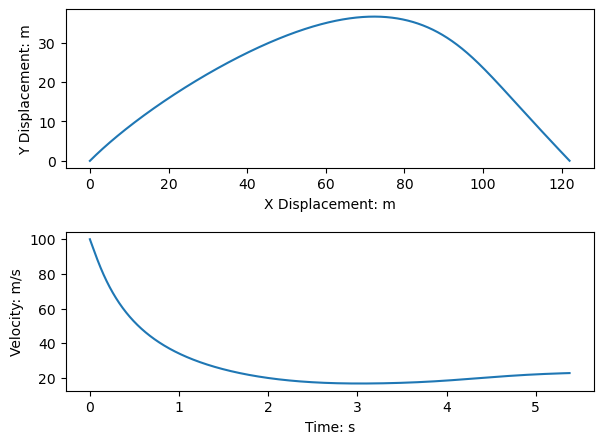

In [18]:
solution_ad = solve_ad()
plot_ad(solution_ad)

## Population modeling
### Simple Example: modeling predator-prey populations
The simple predator-prey model is also referred to as the ([Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)) as are as follows:
$$
\begin{align}
    \frac{dx}{dt} &= \alpha x -\beta xy\\
    \frac{dy}{dt} &= \delta xy -\gamma y\\
\end{align}
$$

Where $x$ represents the prey population and $y$ represents the predators. The parameters $\alpha,\beta$ represent the birth rate and the effect of the predator population on the death rate of the prey population. The parameters $\gamma,\delta$ represent the death rate and the effect of the prey population on the predators' growth rate (i.e. how much much does the availability of prey affect the predator population).

This system of equations models the instantaneous rate of change of the predator and prey populations.

Let foxes be the predators and rabbits be the prey.

In plain terms:

the change in rabbit population = new born rabbits - rabbits eaten by foxes

the change in fox population = increase in foxes due to availability of food - foxes that have died

### Discussion:
- Can you think of any other examples when this model might be useful?
- What happens if the predators go extinct?
- What happens if the prey goes extinct?

### More Complex: non-linear  model of epidemics

Classical [Kermack and McKendrick (1927)](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118) SIR model of epidemics (with reinfection) is as follows:

$$
\begin{align}
    \frac{ds}{dt} &= -si + kr \\
    \frac{di}{dt} &= si -\sigma i \\
    \frac{dr}{dt} &= \sigma i - kr\\
\end{align}
$$

Where the variable $s$ represents the fraction of a population that is **Susceptible** to infection, $i$ is the proportion **Infected** and $r$ the fraction **Recovered**.  For this model $s+i+r =1$.  The parameters $\sigma, k \geq 0$ represent the recovery and relative infection rates.  

### Discussion:
- Can you think of any other factors that might influence these populations?
- How might we include something like vaccinations?
- How might we include something like proximity to an infected population member?

In [19]:
# Solve using SciPy's ODE integrator solve_ivp
from scipy.integrate import  solve_ivp

# define the RHS of our system of ODE's
def sir(t, u, sigma, k):
    s,i,r = u
    return np.array([-s*i + k*r,
                        (s - sigma)*i,
                        sigma*i - k*r ])



### Numerical Solutions 

In [20]:
sigma = .5
k = 0.025
t_max = 200
sir_0 = [0.999, 0.001, 0.]
sol = solve_ivp(sir, [0, t_max] , sir_0, args=(sigma, k), rtol=1.e-6, atol=1.e-9,dense_output = True)

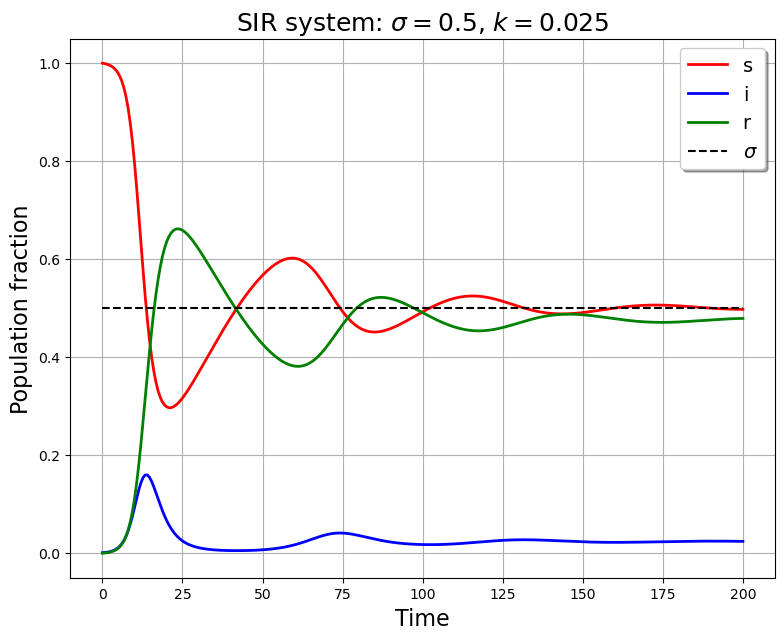

In [21]:
t = np.linspace(0, t_max, 300)
z = sol.sol(t)

fig = plt.figure(figsize=(20,7))
axes = fig.add_subplot(1,2,1)
axes.plot(t,z[0],'r',label='s', linewidth=2)
axes.plot(t,z[1],'b',label='i', linewidth=2)
axes.plot(t,z[2],'g',label='r',  linewidth=2)
axes.plot(t,sigma*np.ones(t.shape),'k--',label=r'$\sigma$')

axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('Time',fontsize=16)
axes.set_ylabel('Population fraction',fontsize=16)
axes.grid()
axes.set_title(r'SIR system: $\sigma={}$, $k={}$'.format(sigma,k),fontsize=18)
plt.show()

### Some questions an epidemiologist or a mathematician might ask:
 - What impacts do small changes to the different parameters have?
 - How do we estimate parameters ($\sigma$, $k$) from data?
 - How do we evaluate whether this is a *good* model?

### Credit
The SIR model section is a modified excerpt from [this notebook](https://github.com/mspieg/intro-numerical-methods/blob/master/00_intro_numerical_methods.ipynb) by Marc Spiegelman and Kyle Mandli